# 감성분석
- 문서,단락, 문장 내에서 극성을 감지하는 텍스트 분석 방법
- 텍스트 간의 비교우위를 밝힘

감성분석의 유형 
- 1. 감정감지 : 기쁨, 슬픔 ( 감정 사전 기반 분석, 머신러닝, 딥러닝 알고리즘 사용)
- 2. 특성(Aspect) 기반 감정분석 : 텍스트 내에서 특성을 기준으로 감정분석, (배터리 수명이 짧다, 화면이 크다)

감정분석 방법
- Lexicon : 사전 기반 분석(긍정사전text, 부정사전text으로 분석하고자하는 텍스트에 적용), 사전에 있는 단어와 일치 단어 등장 여부를 판단한다.
- 머신러닝 : 레이블링된 데이터셋이 필요하다.... 문장이 긍정인지 부정인지 누군가가 분석해놓은 데이터를 가지고 시작한다. 
- 딥러닝 : CNN, RNN 등등

## Lexicon
문맥에 따른 감정분석이 어려움

- ngram을 활용해 문맥을 포함한 사전 생성
- squence를 처리할 수 있는 딥러닝

범용적 사전적용이 어려움

- 도메인에 따라 용어가 다르고, 긍부정 어휘도 다르다.

한글의 경우 감정 사전이 부족


## Machine learning

### 나이브베이즈 분류기 활용 감정분석

베이지안이란? P(X | E)

- 나이브 베이지안 : 두 확률변수의 사전확률과 사후확률 사이의 관계를 나타내는 정리
- 새로운데이터에 의해 사후확률을 구할 수 있고, 사후확률은 다시 사전확률이 되어, 업데이트될 수 있다. -> 베이지안규칙에 기반한 업데이트 정보

Bayes' theorem 확장
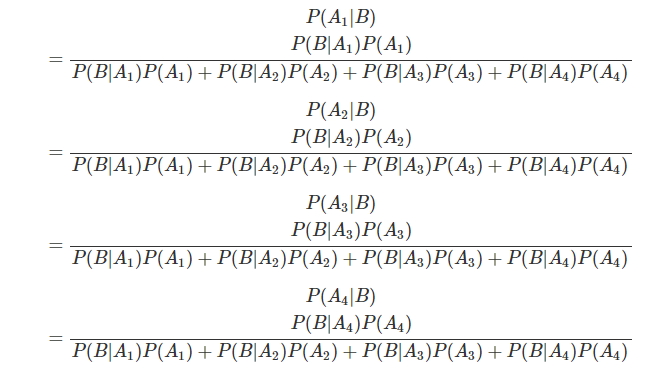

## Laplace Smoothing

- 기존에 등장하지 않았던 새로운 단어가 입력되는 경우?
- 새로운 입력 단어의 확률은 0, 다른 단어와의 조건부 확률도 0
->   ### laplace smoothing은 모든 단어가 1번 이상 등장한다고 가정한다. 
- 계산시 분자에 1을 더해주고 분모에는 모든 데이터 수를 더해준다.


## underflow 
- 무수히 많은 단어중 빈도수가 극히 적은 단어의 경우는?
- 0은 아니지만, 0에 매우 가까운 수로 무한히 작아지는 경우 
-> underflow에서 로그를 취함으로써 방지할 수 있다. 

# NaiveBayes감정분류

### P(positive | happy,weekend) 
### P(negative | happy,weekend)

In [6]:
P = (0.25*0.15*0.5)/((0.25*0.15*0.5)+(0.0625*0.1875*0.5))
P

0.7619047619047619

In [103]:
import pandas as pd

df = pd.read_csv('C:\\Users\\user\\Downloads\\naivebayes_example.csv')
training_set = np.array(df)
print(training_set)

[['i love you' 1]
 ['love happy weekend' 1]
 ['bore work job' 0]
 ['i hate you' 0]
 ['bore weekend' 0]
 ['happy together' 1]]


In [92]:
docs = df.loc[:,'mail'].tolist()
docs
긍정부정 = df.loc[:,'label'].tolist()
긍정부정

[1, 1, 0, 0, 0, 1]

In [100]:
docs_ls = []
for doc in docs:
    docs_ls.append(doc.split())
docs_ls

[['i', 'love', 'you'],
 ['love', 'happy', 'weekend'],
 ['bore', 'work', 'job'],
 ['i', 'hate', 'you'],
 ['bore', 'weekend'],
 ['happy', 'together']]

In [28]:
df

,mail,label
0,i love you,1
1,love happy weekend,1
2,bore work job,0
3,i hate you,0
4,bore weekend,0
5,happy together,1


In [85]:
word2id

defaultdict(<function __main__.<lambda>()>,
            {'i': 0,
             'love': 1,
             'you': 2,
             'happy': 3,
             'weekend': 4,
             'bore': 5,
             'work': 6,
             'job': 7,
             'hate': 8,
             'together': 9})

In [118]:
from collections import defaultdict
import numpy as np

# 토큰화 넣을 빈 딕셔너리 생성
word2id = defaultdict(lambda :len(word2id))


for lis in docs_ls:
    for token in lis:
        word2id[token]
      
df2  = pd.DataFrame(word2id.keys(), columns = ['token | 분류'])

df2['positive'] = 0
df2['negative'] = 0


for idx,lis in enumerate(docs_ls):    
    if df.loc[idx,'label'] == 1 and df2['token | 분류'] in df[:,'mail']:
        df2['positive'] = df[idx,'label']
    elif df.loc[idx,'label'] == 0 and df2['token | 분류'] in df[:,'mail']:
        df2['negative'] = df[idx,'label']

print(df)

TypeError: '(slice(None, None, None), 'mail')' is an invalid key

In [119]:
print(df)

                 mail  label
0          i love you      1
1  love happy weekend      1
2       bore work job      0
3          i hate you      0
4        bore weekend      0
5      happy together      1


In [120]:
print(df2)

  token | 분류  positive  negative
0          i         0         0
1       love         0         0
2        you         0         0
3      happy         0         0
4    weekend         0         0
5       bore         0         0
6       work         0         0
7        job         0         0
8       hate         0         0
9   together         0         0


Laplace Smoothing 적용
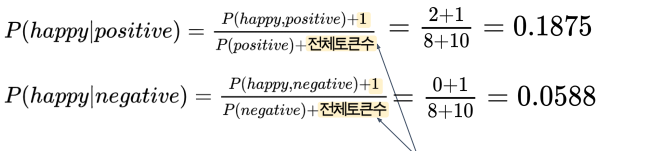

In [36]:
p_pos = 0.5
p_nav = 0.5
p_hap_pos = 0.1667
p_week_pos = 0.1111
p_hap_nav = 0.0556
p_week_nav = 0.1111


POSITIVE = (p_hap_pos * p_week_pos * p_pos)/((p_hap_pos * p_week_pos * p_pos) + (p_hap_nav * p_week_nav * p_nav))
print('P(positive | happy,weekend) : %.4f'%(POSITIVE))

NAGATIVE = (p_hap_nav * p_week_nav * p_nav)/((p_hap_pos * p_week_pos * p_pos) + (p_hap_nav * p_week_nav * p_nav))
print('P(negative | happy,weekend) : %.4f'%(NAGATIVE))

P(positive | happy,weekend) : 0.7499
P(negative | happy,weekend) : 0.2501


# -------------------------------------------------------